In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download shuvoalok/ck-dataset
! unzip ck-dataset.zip -d ck_data

##CK+ Dataset

In [ ]:
import os
import math
import numpy as np
import cv2

import seaborn as sns
import tensorflow as tf
import pandas as pd

from keras.utils import to_categorical
from matplotlib import pyplot

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras import optimizers
from keras.applications.mobilenet import MobileNet
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.applications import ResNet50V2 as ResNet
from keras.optimizers import Adam

In [ ]:
batch_size = 64

precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
auc_roc = tf.keras.metrics.AUC(num_thresholds=200, name='auc_roc')
train_dir = "/content/ck_data"
test_dir = "/content/ck_data"
num_classes = 7

In [ ]:
datagen = ImageDataGenerator(rescale=1 / 255)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 981 images belonging to 7 classes.
Found 981 images belonging to 7 classes.


In [ ]:
resnet = ResNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = resnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)
for layer in resnet.layers:
    layer.trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall, auc_roc])

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
history = model.fit(train_generator,
          epochs=8,
          validation_data=test_generator,
          callbacks=[early_stopping])

Epoch 1/8
16/16 [==============================] - 27s 614ms/step - loss: 1.2707 - accuracy: 0.5729 - precision: 0.7274 - recall: 0.4516 - auc_roc: 0.8641 - val_loss: 0.6434 - val_accuracy: 0.7503 - val_precision: 0.8708 - val_recall: 0.6595 - val_auc_roc: 0.9673
Epoch 2/8
16/16 [==============================] - 5s 346ms/step - loss: 0.6060 - accuracy: 0.7870 - precision: 0.8817 - recall: 0.7064 - auc_roc: 0.9697 - val_loss: 0.4068 - val_accuracy: 0.8919 - val_precision: 0.9636 - val_recall: 0.7819 - val_auc_roc: 0.9911
Epoch 3/8
16/16 [==============================] - 6s 363ms/step - loss: 0.4355 - accuracy: 0.8573 - precision: 0.9117 - recall: 0.7890 - auc_roc: 0.9859 - val_loss: 0.2686 - val_accuracy: 0.9225 - val_precision: 0.9641 - val_recall: 0.8756 - val_auc_roc: 0.9958
Epoch 4/8
16/16 [==============================] - 6s 352ms/step - loss: 0.3067 - accuracy: 0.9032 - precision: 0.9371 - recall: 0.8654 - auc_roc: 0.9932 - val_loss: 0.1908 - val_accuracy: 0.9674 - val_precisio

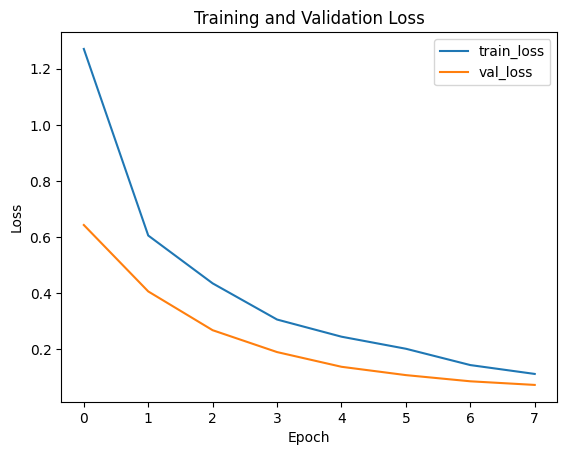

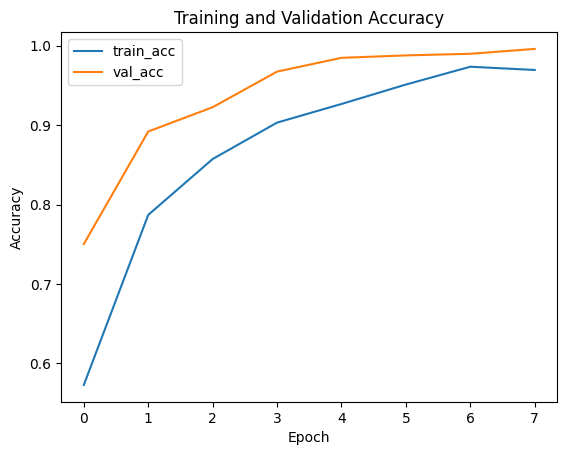

In [ ]:
import matplotlib.pyplot as plt
def plot(history):
    # Plot loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot(history)

In [ ]:
train_a = model.evaluate(train_generator)
test_a   = model.evaluate(test_generator)


16/16 [==============================] - 3s 178ms/step - loss: 0.0738 - accuracy: 0.9959 - precision: 0.9969 - recall: 0.9786 - auc_roc: 1.0000


In [ ]:
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_a[1]*100, test_a[1]*100))

final train accuracy = 99.59 , validation accuracy = 99.59


In [ ]:
model_json = model.to_json()
with open("ResNET_CK.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_ResNET_CK.h5")
print("Saved model to disk")

Saved model to disk


##FER Dataset

In [ ]:
! kaggle datasets download msambare/fer2013
! unzip fer2013.zip -d fer2013_data

In [ ]:
batch_size = 64

precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
auc_roc = tf.keras.metrics.AUC(num_thresholds=200, name='auc_roc')
train_dir = '/content/fer2013_data/train'
test_dir = '/content/fer2013_data/test'
num_classes = 7

In [ ]:
datagen = ImageDataGenerator(rescale=1 / 255)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
resnet = ResNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = resnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)
for layer in resnet.layers:
    layer.trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall, auc_roc])

In [ ]:
history_2 = model.fit(train_generator,
          epochs=25,
          validation_data=test_generator,
          callbacks=[early_stopping])

Epoch 1/25
449/449 [==============================] - 122s 263ms/step - loss: 1.5049 - accuracy: 0.4307 - precision: 0.6508 - recall: 0.1969 - auc_roc: 0.7985 - val_loss: 1.3259 - val_accuracy: 0.4985 - val_precision: 0.7669 - val_recall: 0.2334 - val_auc_roc: 0.8509
Epoch 2/25
449/449 [==============================] - 101s 224ms/step - loss: 1.3471 - accuracy: 0.4870 - precision: 0.7004 - recall: 0.2579 - auc_roc: 0.8425 - val_loss: 1.2796 - val_accuracy: 0.5113 - val_precision: 0.7721 - val_recall: 0.2572 - val_auc_roc: 0.8602
Epoch 3/25
449/449 [==============================] - 98s 219ms/step - loss: 1.2853 - accuracy: 0.5157 - precision: 0.7120 - recall: 0.2946 - auc_roc: 0.8578 - val_loss: 1.2451 - val_accuracy: 0.5241 - val_precision: 0.7491 - val_recall: 0.2945 - val_auc_roc: 0.8670
Epoch 4/25
449/449 [==============================] - 99s 220ms/step - loss: 1.2362 - accuracy: 0.5368 - precision: 0.7248 - recall: 0.3262 - auc_roc: 0.8694 - val_loss: 1.2223 - val_accuracy: 0.53

In [ ]:
model_json = model.to_json()
with open("ResNET_FER.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_ReesNET_FER.h5")
print("Saved model to disk")

Saved model to disk


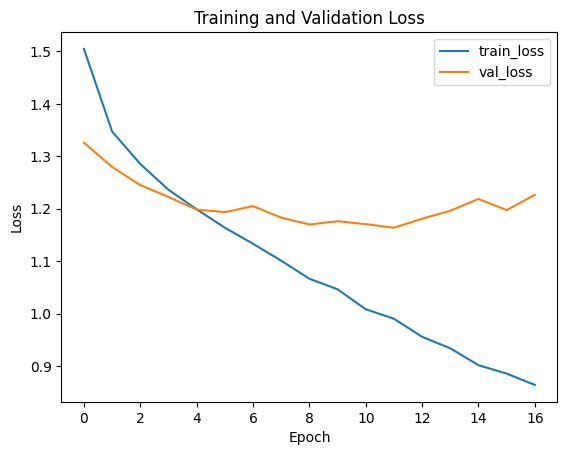

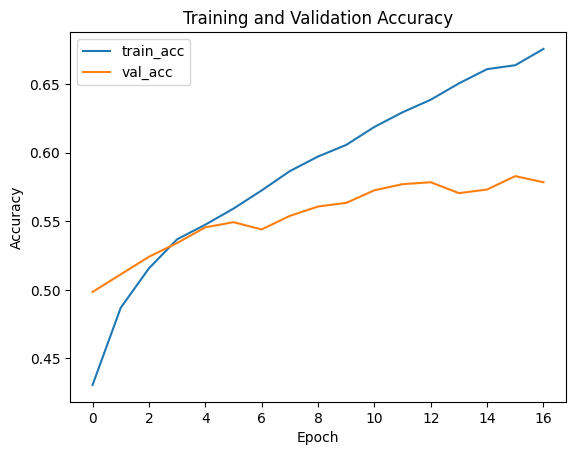

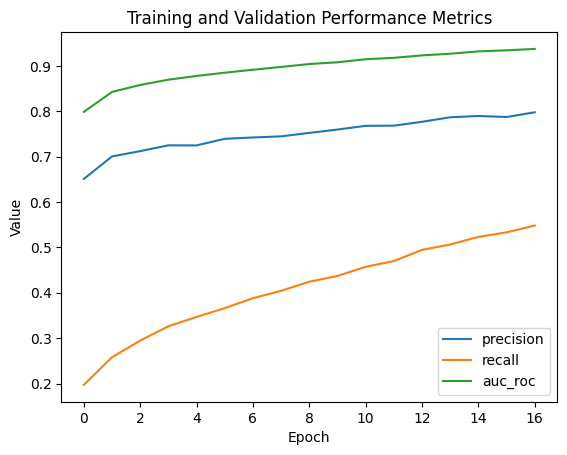

In [ ]:
import matplotlib.pyplot as plt
def plot(history):
    # Plot loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['precision'], label='precision')
    plt.plot(history.history['recall'], label='recall')
    plt.plot(history.history['auc_roc'], label='auc_roc')
    plt.title('Training and Validation Performance Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot(history_2)

In [ ]:
pred_FER = model.predict(test_generator)

113/113 [==============================] - 20s 174ms/step


In [ ]:
train_a = model.evaluate(train_generator)
test_a = model.evaluate(test_generator)

113/113 [==============================] - 20s 173ms/step - loss: 1.1638 - accuracy: 0.5770 - precision: 0.7261 - recall: 0.4166 - auc_roc: 0.8877


In [ ]:
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_a[1]*100, test_a[1]*100))

final train accuracy = 72.08 , validation accuracy = 57.70
